# Advanced Machine Learning
## Project 1 - Optimization Algorithms
### Authors: Bartosz Grabek, Izabela Telejko, Grzegorz Zbrzeżny

In [2]:
import numpy as np
from utils.train_functions import cv
from utils.preprocess_functions import(
    preprocess_booking, # SGD might not be converging
    preprocess_churn, # OK
    preprocess_employee, # SGD might not be converging
    preprocess_challenger, # SUS
    preprocess_jungle,
    preprocess_water # OK
)
from utils.IWLS import IWLS
from utils.GD import GD
from utils.plots import (
    plot_figures_for_cv,
    plot_acc_boxplots
)

### TODO:
Some columns in X_challenger and X_jungle have only 0 values

In [4]:
sgd_acc_list, adam_acc_list, iwls_acc_list, l_iwls_vals_list, l_sgd_vals_list, l_adam_vals_list = cv(preprocess_booking, n_splits=2)

CV split 1
Removing multicolinear columns in churn dataset...


ADAM:  37%|███▋      | 183/500 [00:07<00:12, 24.73it/s]


Balanced accuracy of SGD without optimizer is: 0.5128205128205128
Balanced accuracy of GD with ADAM is: 0.6209514170040487
Balanced accuracy of IWLS is: 0.617661943319838
Balanced accuracy of LR from Scikit is 0.6209514170040487
CV split 2
Removing multicolinear columns in churn dataset...


ADAM:  45%|████▌     | 226/500 [00:09<00:11, 24.55it/s]

Balanced accuracy of SGD without optimizer is: 0.5911376492771842
Balanced accuracy of GD with ADAM is: 0.6290069138906349
Balanced accuracy of IWLS is: 0.6455059710873665
Balanced accuracy of LR from Scikit is 0.6455059710873665


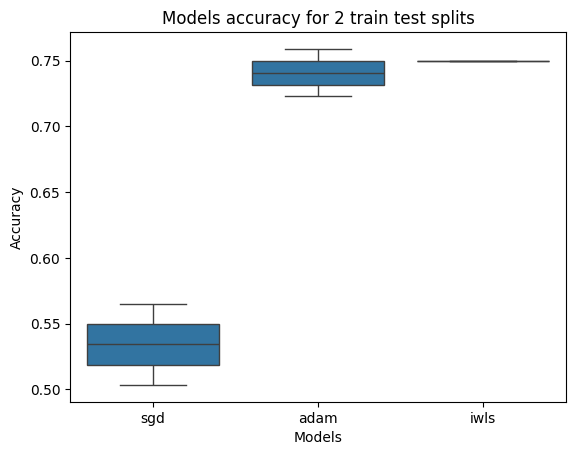

In [6]:
plot_acc_boxplots(sgd_acc_list, adam_acc_list, iwls_acc_list)

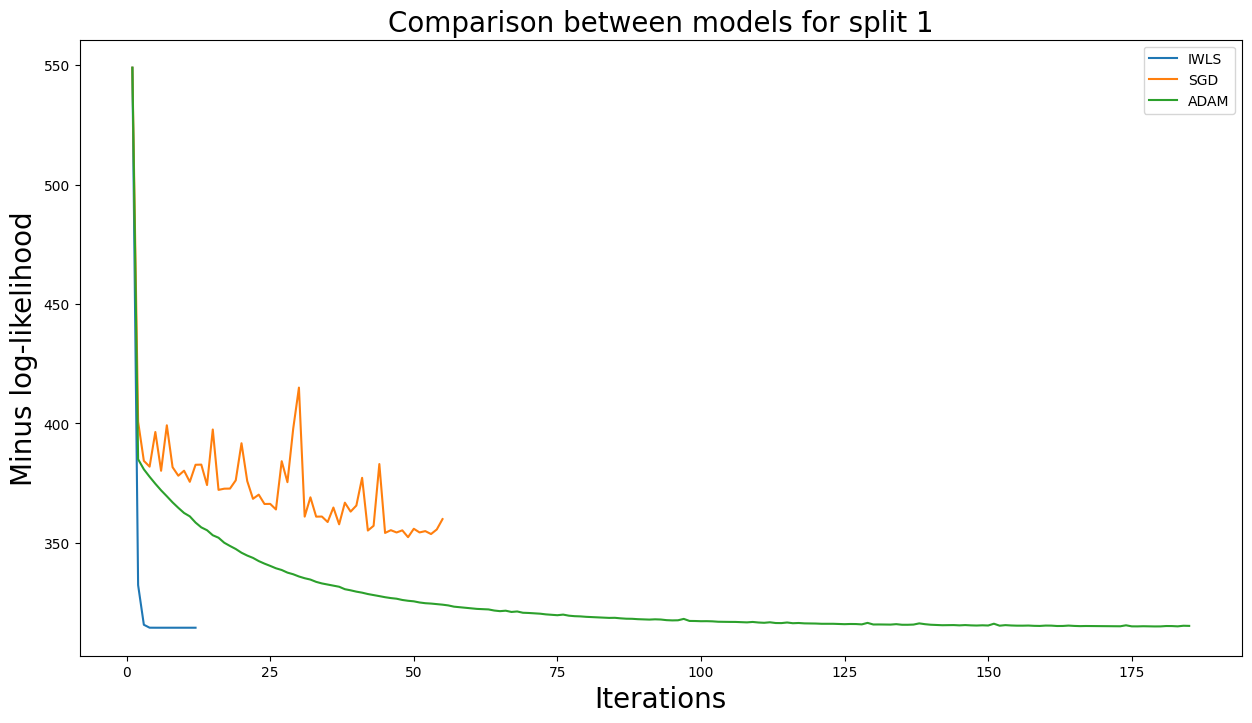

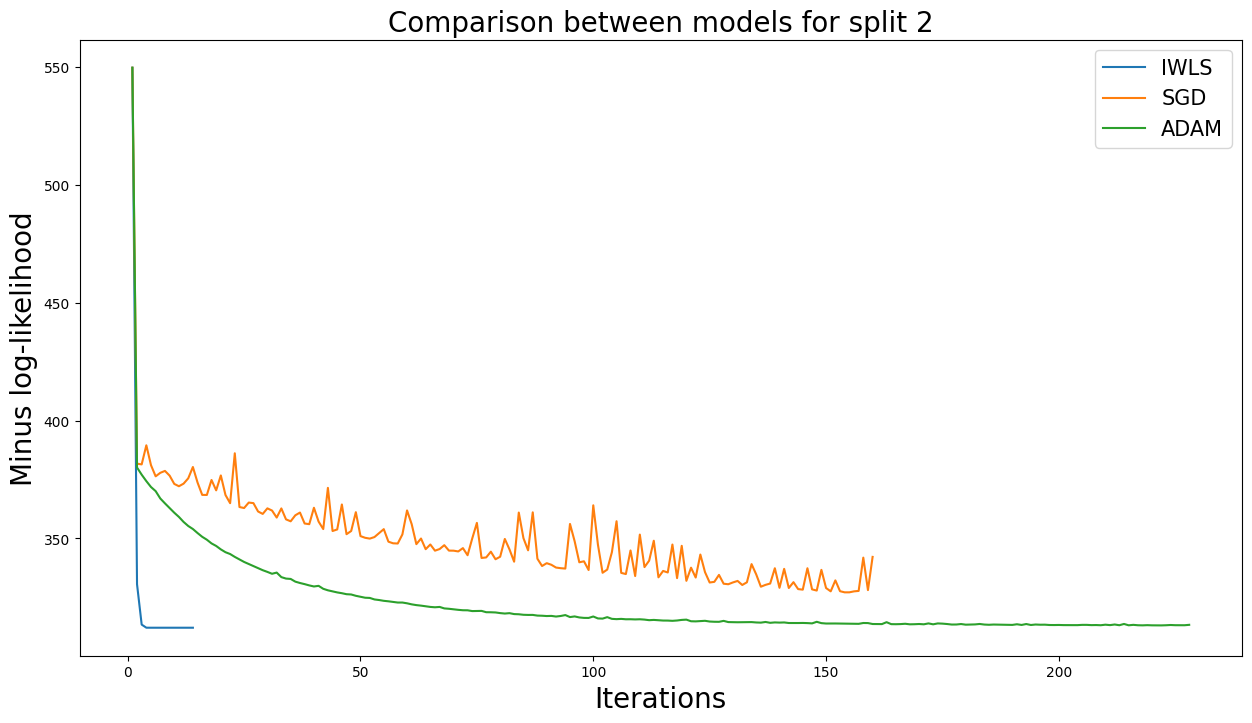

In [5]:
plot_figures_for_cv(l_iwls_vals_list, l_sgd_vals_list, l_adam_vals_list)

### Data generated from logistic model

In [20]:
beta1 = 2

n1 = 1000
x1 = np.random.exponential(1, size=n1)

n2 = 1000
x2 = np.random.exponential(1/(beta1+1), size=n2)

X = np.expand_dims(np.concatenate((x1, x2), axis=0), axis=1)
X = np.concatenate((np.ones((X.shape[0], 1)), X), 1)
y = np.expand_dims(np.concatenate((np.ones((1, n1)), np.zeros((1, n2))), axis=1)[0], 1)

In [21]:
pi = n1 / (n1 + n2)
b0 = -np.log((1 + beta1) * ((1-pi)/pi))

In [22]:
l_iwls_vals, best_beta_iwls = IWLS(X, y, n_iter=100, print_likeli=False)
l_sgd_vals, best_beta_sgd = GD(X, y, 0.0002, n_epoch=200, print_likeli=False, use_adam=False)
l_adam_vals, best_beta_adam = GD(X, y, 0.0002, n_epoch=200, print_likeli=False)

Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Epochs: 100%|██████████| 200/200 [00:25<00:00,  7.97it/s]


In [23]:
print(f"Theoretical betas: b0: {b0}, b1: {beta1}" )
print(f"Empirical betas for SGD without optimizers: b0: {best_beta_sgd[0]}, b1: {best_beta_sgd[1]}")
print(f"Empirical betas for SGD with ADAM: b0: {best_beta_adam[0]}, b1: {best_beta_adam[1]}")
print(f"Empirical betas for IWLS: b0: {best_beta_iwls[0][0]}, b1: {best_beta_iwls[1][0]}")

Theoretical betas: b0: -1.0986122886681098, b1: 2
Empirical betas for SGD without optimizers: b0: -1.0699219012548087, b1: 1.990073451417658
Empirical betas for SGD with ADAM: b0: -1.1692053980479125, b1: 2.18596442046799
Empirical betas for IWLS: b0: -1.1669807566919372, b1: 2.178933710128488
